In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [2]:
from camera import undistort

### Threshold functions

TODO: show difference of abs_sobelx and y on 'test_images/test4.jpg' with gray vs saturation processor

In [3]:
gray_processor = lambda img: cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
saturation_processor = lambda img: cv2.cvtColor(img, cv2.COLOR_RGB2HLS)[:,:,2]
hue_processor = lambda img: cv2.cvtColor(img, cv2.COLOR_RGB2HLS)[:,:,0]

In [84]:
def abs_sobel(img, img_processor=gray_processor, orient='x', sobel_kernel=3, threshold=(0, 255)):
    """
    Returns a binary mask set to 1 in locations where the absolute
    Sobel gradient in `orientation` axis is in the provided threshold range.
    """
    img = np.copy(img)
    img = img_processor(img)
    sobel = cv2.Sobel(img, cv2.CV_64F, 
                      1 if orient == 'x' else 0, 
                      0 if orient == 'x' else 1,
                      None, sobel_kernel)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel, np.uint8)
    binary_output[(scaled_sobel>=threshold[0]) & (scaled_sobel<=threshold[1])] = 1

    return binary_output

In [85]:
def magnitude(img, img_processor=gray_processor, sobel_kernel=3, threshold=(0, 255)):
    """
    Returns a binary mask set to 1 in locations where the magnitude
    of x and y Sobel gradients as (sobel_x**2+sobel_y**2)**0.5
    is in the provided threshold range.
    """
    img = np.copy(img)
    img = img_processor(img)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, None, sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, None, sobel_kernel)
    mag = np.sqrt(sobelx**2 + sobely**2)
    mag = np.uint8(255*mag/np.max(mag))
    binary_output = np.zeros_like(mag, np.uint8)
    binary_output[(mag >= threshold[0]) & (mag <= threshold[1])] = 1
    
    return binary_output

In [86]:
def direction(img, img_processor=gray_processor, sobel_kernel=3, threshold=(0, np.pi/2)):
    """
    Returns a binary mask set to 1 in locations where the direction
    of x and y Sobel gradients as arctan(sobel_y/sobel_x)
    is in the provided threshold range.
    """
    img = np.copy(img)
    img = img_processor(img)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, None, sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, None, sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    dir_grad = np.arctan2(abs_sobely, abs_sobelx)
    binary_output = np.zeros_like(dir_grad, np.uint8)
    binary_output[(dir_grad >= threshold[0]) & (dir_grad <= threshold[1])] = 1
    return binary_output

In [136]:
def hls(img, h_threshold=(0, 180), l_threshold=(0, 255), s_threshold=(0, 255)):
    """
    Returns a binary mask set to 1 in locations where each HLS image channel
    is in the provided threshold ranges.
    """
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    binary_output = np.zeros(img.shape[:2])
    binary_output[((hls[:,:,0] >= h_threshold[0]) & (hls[:,:,0] <= h_threshold[1])) &
                  ((hls[:,:,1] >= l_threshold[0]) & (hls[:,:,1] <= l_threshold[1])) &
                  ((hls[:,:,2] >= s_threshold[0]) & (hls[:,:,2] <= s_threshold[1]))] = 1
    return binary_output

def hue(img, threshold=(0, 180)):
    """
    Returns a binary mask set to 1 in locations where image saturation
    is in the provided threshold range.
    """
    return hls(img, h_threshold=threshold)

def lightness(img, threshold=(0, 255)):
    """
    Returns a binary mask set to 1 in locations where image saturation
    is in the provided threshold range.
    """
    return hls(img, l_threshold=threshold)

def saturation(img, threshold=(0, 255)):
    """
    Returns a binary mask set to 1 in locations where image saturation
    is in the provided threshold range.
    """
    return hls(img, s_threshold=threshold)

In [221]:
image = undistort(mpimg.imread('test_images/test1.jpg'))

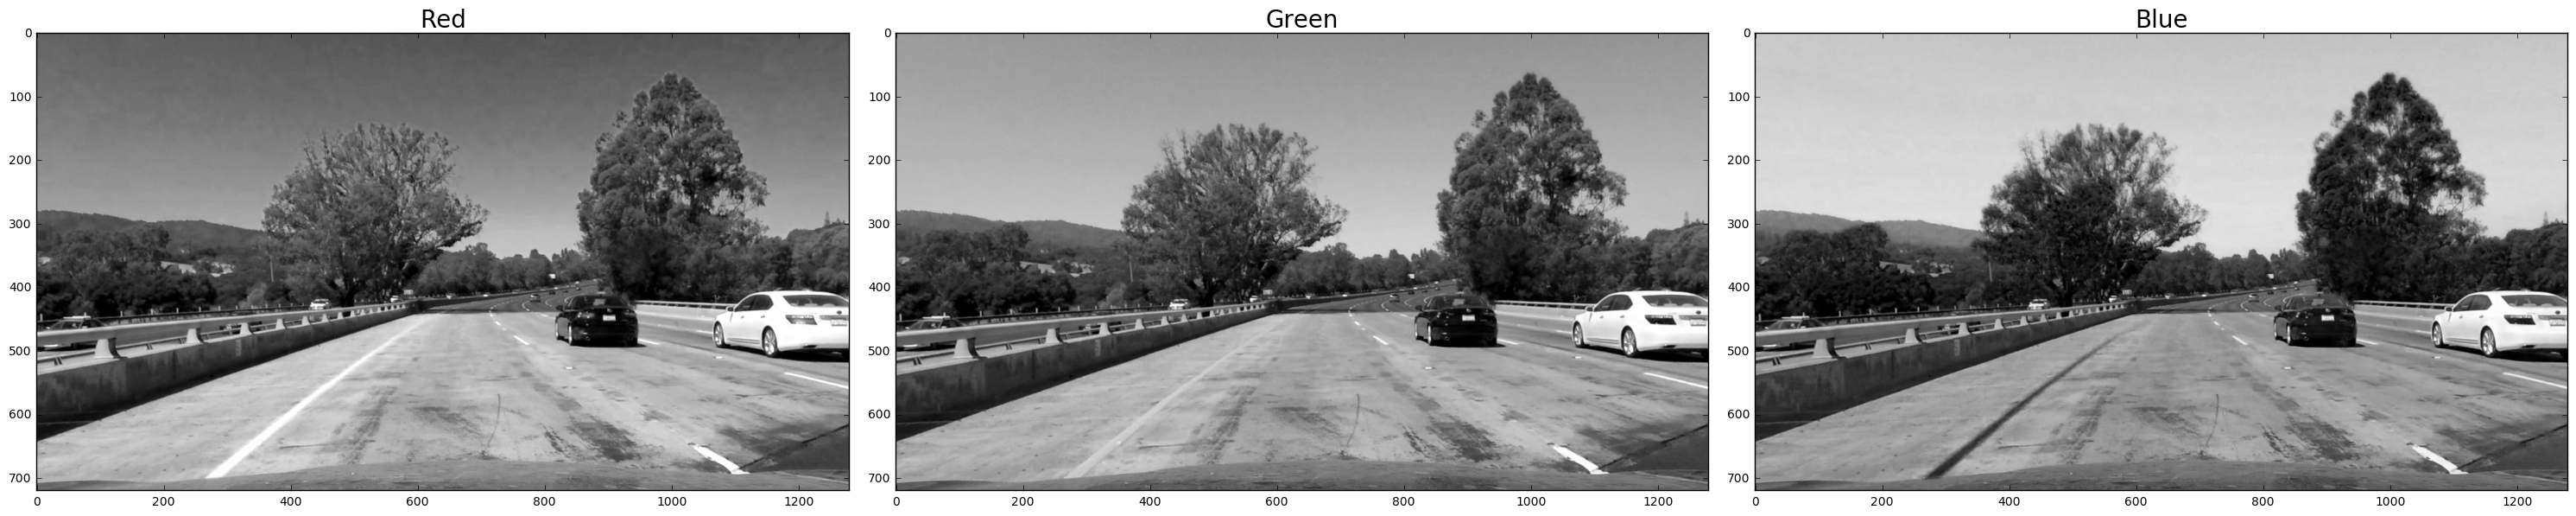

In [222]:
f, axs = plt.subplots(1, 3, figsize=(30, 10))
f.tight_layout()
axs = axs.reshape(-1)
for i, t in [(0, 'Red'), (1, 'Green'), (2, 'Blue')]:
    axs[i].imshow(image[:, :, i], cmap='gray')
    axs[i].set_title(t, fontsize=20)

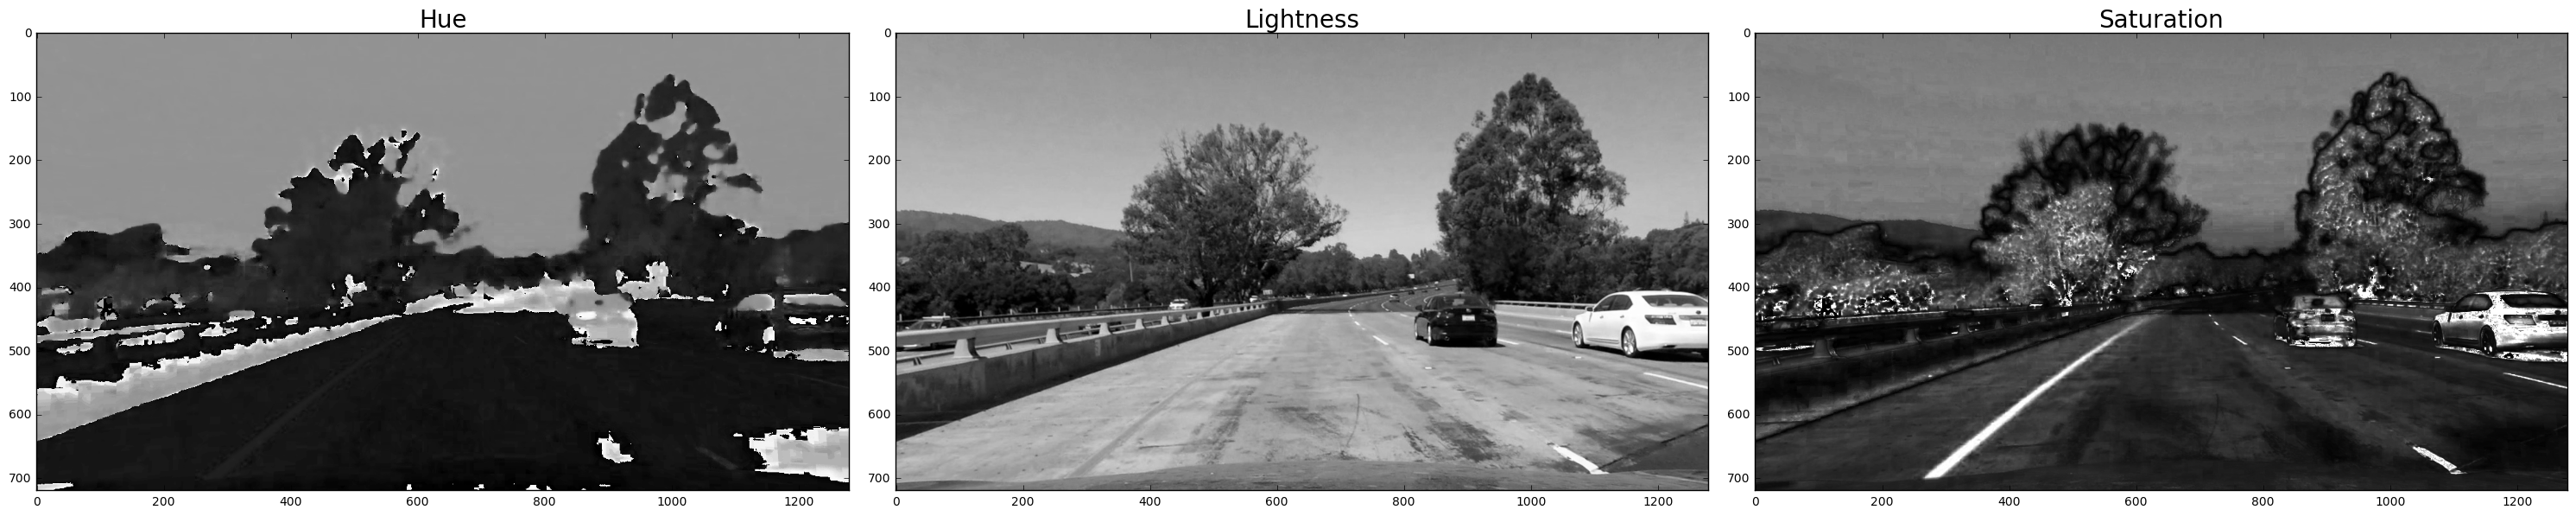

In [223]:
f, axs = plt.subplots(1, 3, figsize=(30, 10))
f.tight_layout()
axs = axs.reshape(-1)
hls_img = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
for i, t in [(0, 'Hue'), (1, 'Lightness'), (2, 'Saturation')]:
    axs[i].imshow(hls_img[:, :, i], cmap='gray')
    axs[i].set_title(t, fontsize=20)

In [246]:
sobel_kernel = 7
sobel_threshold = (20, 255)
magnitude_threshold = (50, 255)
direction_threshold = (0.7, 1.3)
s_channel_threshold = (50, 255)
l_channel_threshold = (100, 255)
h_channel_threshold = (50, 180)
yellow_threshold = ((0, 45), (85, 255), (95, 255))
white_threshold = ((0, 180), (195, 255), (0, 255))

In [247]:
sobel_x_gray = abs_sobel(image, img_processor=gray_processor, threshold=sobel_threshold, sobel_kernel=sobel_kernel)
sobel_y_gray = abs_sobel(image, img_processor=gray_processor, orient='y', threshold=sobel_threshold, sobel_kernel=sobel_kernel)
sobel_x = abs_sobel(image, img_processor=saturation_processor, threshold=sobel_threshold, sobel_kernel=sobel_kernel)
sobel_y = abs_sobel(image, img_processor=saturation_processor, orient='y', threshold=sobel_threshold, sobel_kernel=sobel_kernel)
grad_mag = magnitude(image, img_processor=saturation_processor, threshold=magnitude_threshold, sobel_kernel=sobel_kernel)
grad_dir = direction(image, img_processor=saturation_processor, threshold=direction_threshold, sobel_kernel=sobel_kernel)
s_channel = saturation(image, threshold=s_channel_threshold)
l_channel = lightness(image, threshold=l_channel_threshold)
h_channel = hue(image, threshold=h_channel_threshold)

yellow = hls(image, h_threshold=yellow_threshold[0], l_threshold=yellow_threshold[1],
            s_threshold=yellow_threshold[2])
white = hls(image, h_threshold=white_threshold[0], l_threshold=white_threshold[1],
            s_threshold=white_threshold[2])

red_and_green = np.zeros_like(grad_dir)
red_and_green[(image[:,:,0] > 190) & (image[:,:,1] > 190)] = 1

combined1 = np.zeros_like(grad_dir)
combined1[((s_channel == 1) | (red_and_green == 1)) & 
          ((sobel_y == 1) | (sobel_x == 1)) & 
          ((grad_dir == 1) | (grad_mag == 1))] = 1

combined2 = np.zeros_like(grad_dir)
combined2[(sobel_x == 1) & (s_channel == 1)] = 1

combined3 = np.zeros_like(grad_dir)
combined3[(sobel_x == 1) & ((grad_dir == 1) | (red_and_green == 1))] = 1
#combined2[(image[:,:,0] > 200)] = 1

combined4 = np.zeros_like(grad_dir)
#combined4[(s_channel == 1) & ((sobel_y == 1) | (sobel_x == 1) | (red_and_green == 1)) & (grad_dir == 1)] = 1
combined4[((sobel_x_gray == 1) | (sobel_x == 1))] = 1

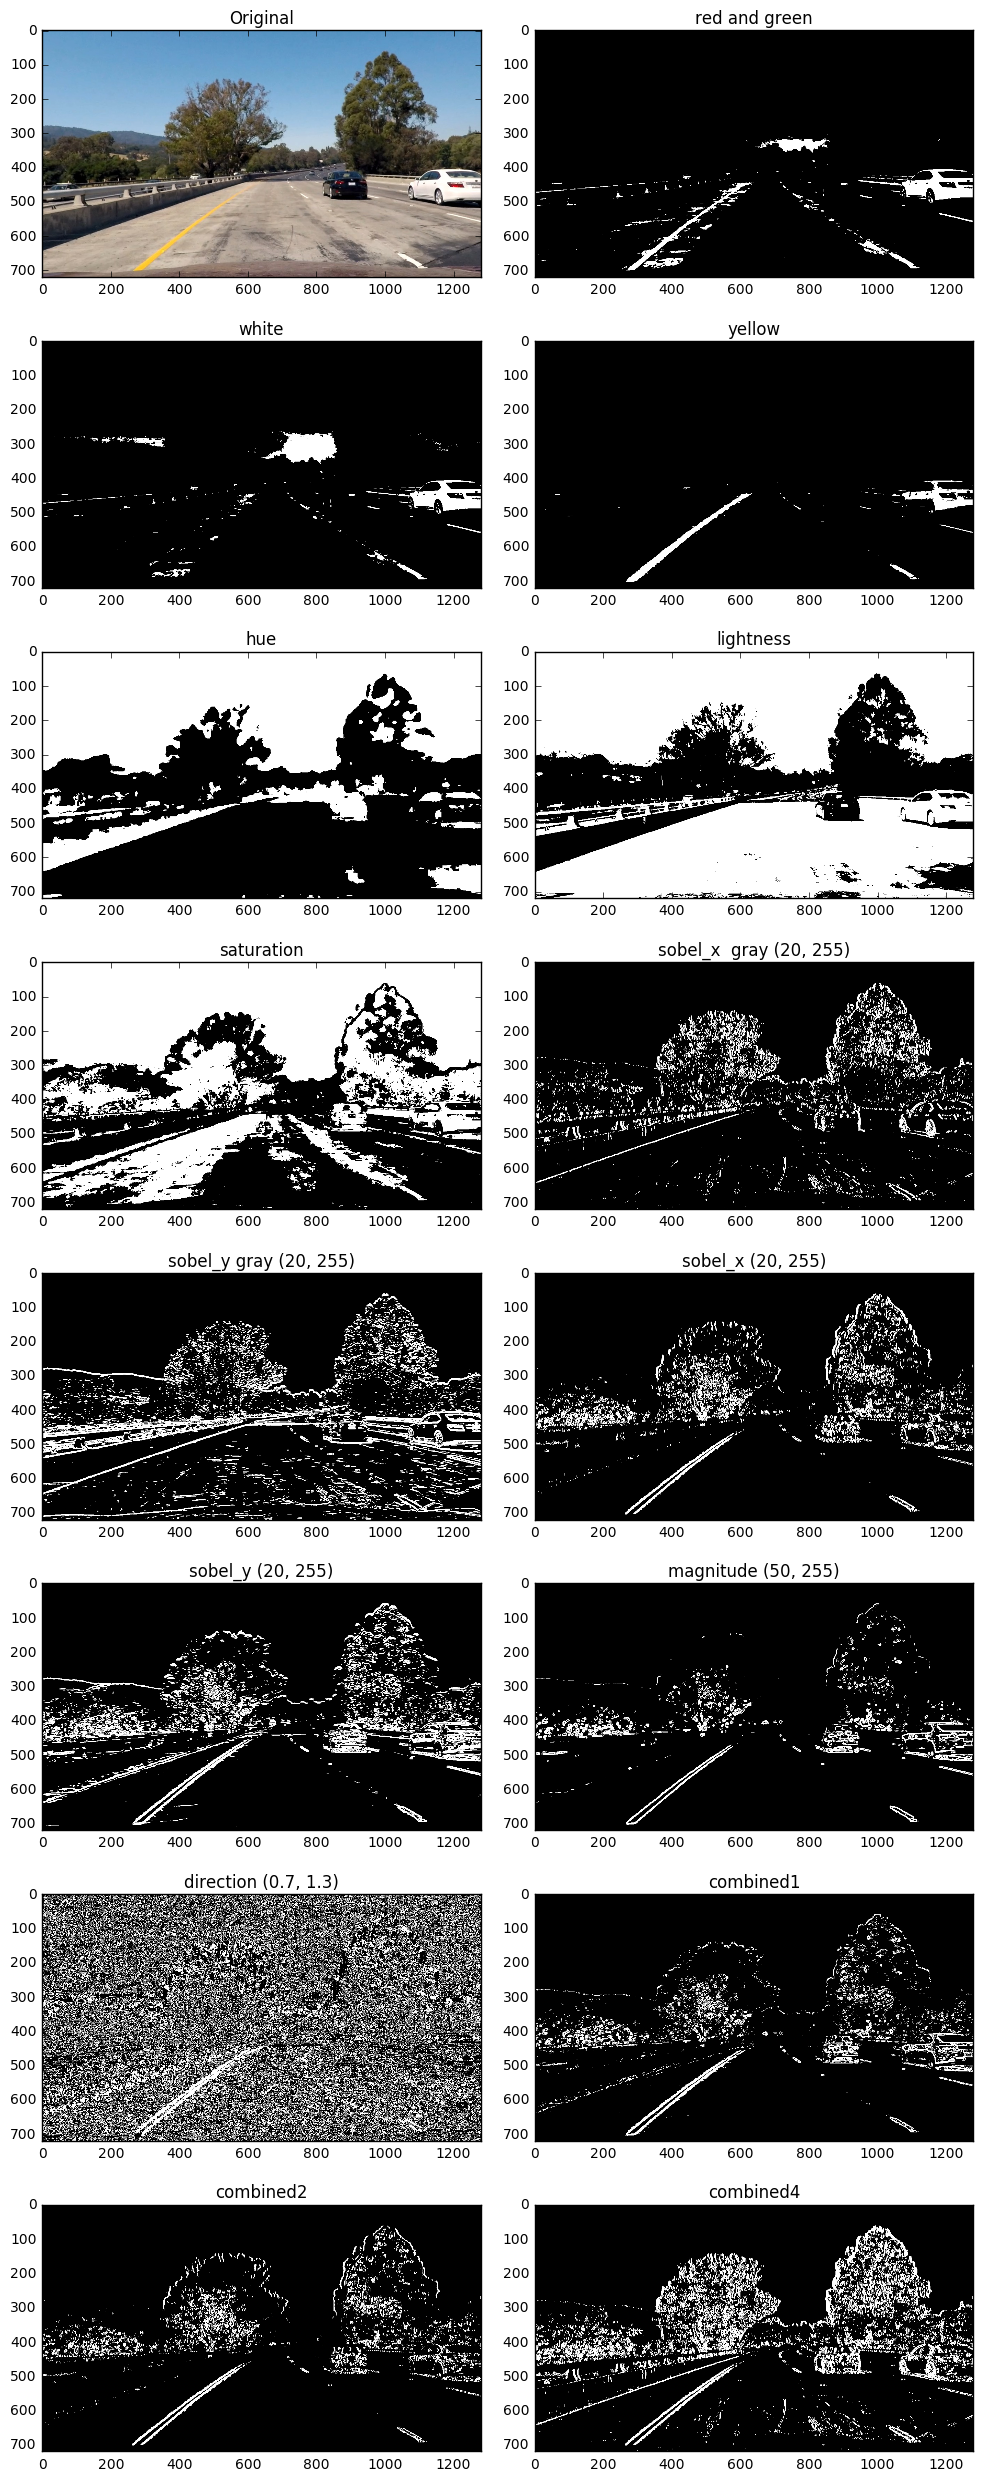

In [248]:
f, axs = plt.subplots(8, 2, figsize=(10, 25))
f.tight_layout()
axs = axs.reshape(-1)
axs[0].imshow(image)
axs[0].set_title('Original')
for i, v in enumerate([(red_and_green, 'red and green'),
                       (white, 'white'),
                       (yellow, 'yellow'),
                       (h_channel, 'hue'),
                       (l_channel, 'lightness'),
                       (s_channel, 'saturation'),
                       (sobel_x_gray, 'sobel_x  gray {}'.format(sobel_threshold)), 
                        (sobel_y_gray, 'sobel_y gray {}'.format(sobel_threshold)),
                        (sobel_x, 'sobel_x {}'.format(sobel_threshold)), 
                        (sobel_y, 'sobel_y {}'.format(sobel_threshold)),
                        (grad_mag, 'magnitude {}'.format(magnitude_threshold)),
                        (grad_dir, 'direction {}'.format(direction_threshold)),
                        (combined1, 'combined1'), (combined2, 'combined2'),
                       # (combined3, 'combined3'), 
                       (combined4, 'combined4')]):
    axs[i+1].imshow(v[0], cmap='gray')
    axs[i+1].set_title(v[1])

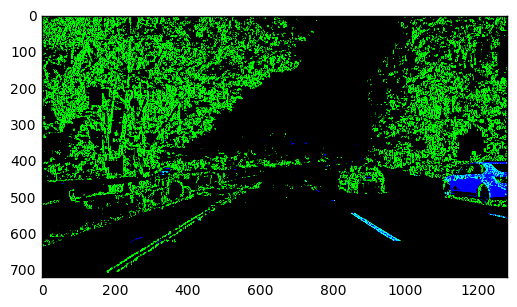

In [207]:
color_binary = np.dstack((np.zeros_like(grad_dir), sobel_x*255, red_and_green*255))
plt.imshow(color_binary)

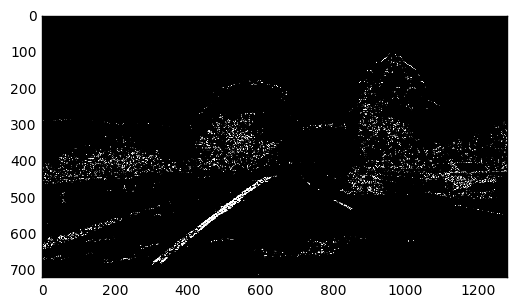

In [313]:
combined = np.zeros_like(grad_dir)
combined[(s_channel == 1) & ((sobel_y == 1) | (sobel_x == 1) | (red_and_green == 1)) & (grad_dir == 1)] = 1
plt.imshow(combined, cmap='gray')

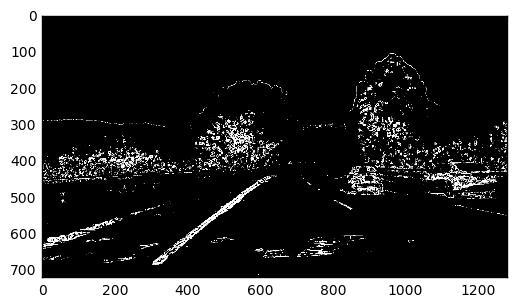

In [314]:
combined = np.zeros_like(grad_dir)
combined[(s_channel == 1) & ((sobel_y == 1) | (sobel_x == 1) | (red_and_green == 1)) & 
         ((grad_dir == 1) | (grad_mag == 1))] = 1
plt.imshow(combined, cmap='gray')

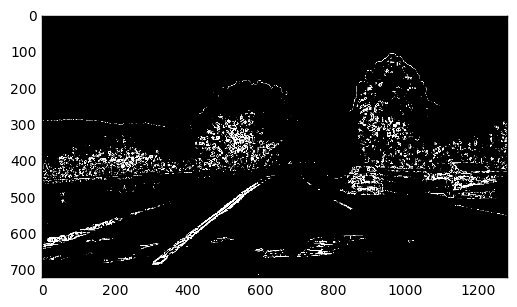

In [315]:
combined = np.zeros_like(grad_dir)
combined[(s_channel == 1) & ((sobel_y == 1) | (sobel_x == 1)) & 
         ((grad_dir == 1) | (grad_mag == 1))] = 1
plt.imshow(combined, cmap='gray')

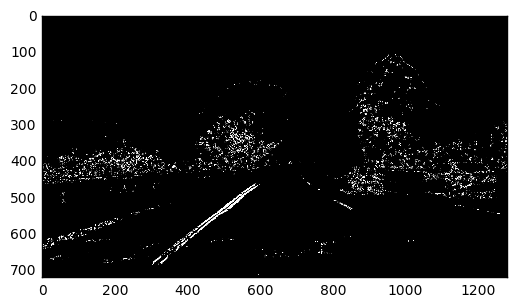

In [316]:
combined = np.zeros_like(grad_dir)
combined[(s_channel == 1) & ((sobel_y == 1) & (sobel_x == 1)) & 
         ((grad_dir == 1) | (grad_mag == 1))] = 1
plt.imshow(combined, cmap='gray')

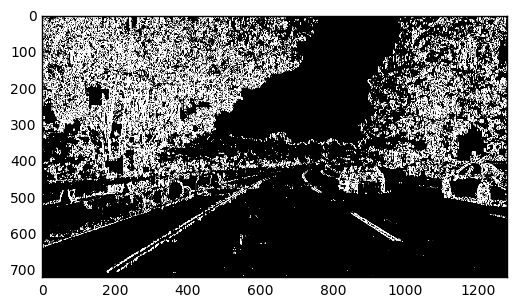

In [130]:
combined = np.zeros_like(grad_dir)
combined[((sobel_x_gray == 1) | (sobel_x == 1))] = 1
plt.imshow(combined, cmap='gray')

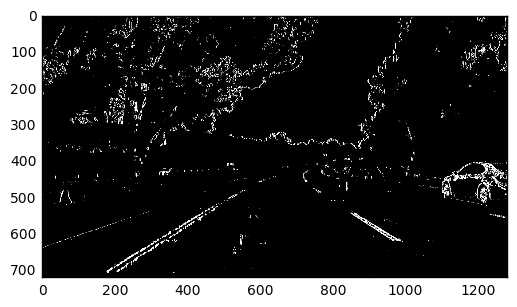

In [133]:
combined = np.zeros_like(grad_dir)
combined[((sobel_x_gray == 1) | (sobel_x == 1)) &
        (l_channel == 1)] = 1
plt.imshow(combined, cmap='gray')

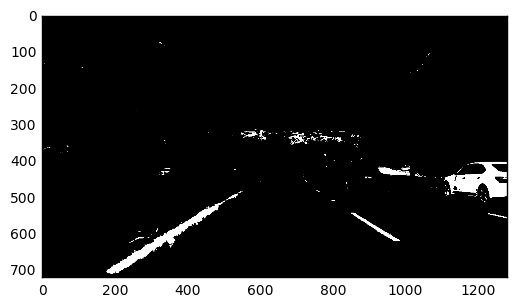

In [196]:
combined = np.zeros_like(grad_dir)
combined[((white == 1) | (yellow == 1))] = 1
plt.imshow(combined, cmap='gray')

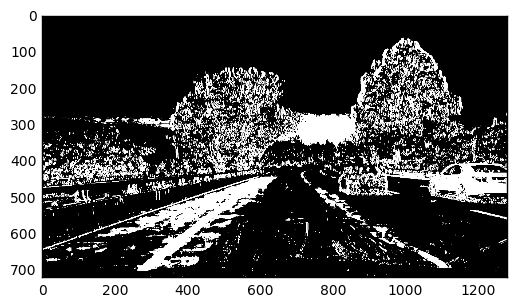

In [231]:
combineda = np.zeros_like(grad_dir)
combineda[((white == 1) | (yellow == 1)) |
        ((sobel_x_gray == 1) | (sobel_x == 1))] = 1
plt.imshow(combineda, cmap='gray')

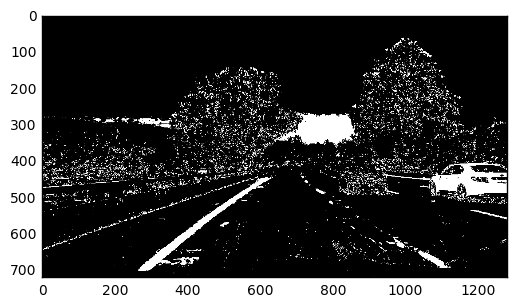

In [249]:
combinedb = np.zeros_like(grad_dir)
combinedb[((white == 1) | (yellow == 1)) |
        ((sobel_x_gray == 1) | (sobel_x == 1))
        & (grad_dir == 1)] = 1
plt.imshow(combinedb, cmap='gray')